No handles with labels found to put in legend.


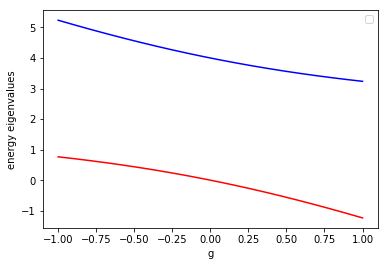

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import math

def eigenvals(g1,eps):
    e1 = eps-g1 - np.sqrt(g1**2 + eps**2)
    e2 = eps-g1 + np.sqrt(g1**2 + eps**2)
    return e1,e2
    

g= np.linspace(-1.0,1.0,20) #in MeV
eps = 2.0 #in MeV
E1 = []
E2 = []
for i in range(len(g)):
    e1,e2 = eigenvals(g[i],eps)
    E1.append(e1)
    E2.append(e2)
    
plt.plot(g,E1,'r',g,E2,'b')
plt.xlabel('g')
plt.ylabel('energy eigenvalues')
plt.legend()

[-1.         -0.71428571 -0.42857143 -0.14285714  0.14285714  0.42857143
  0.71428571  1.        ]
number of states =  6


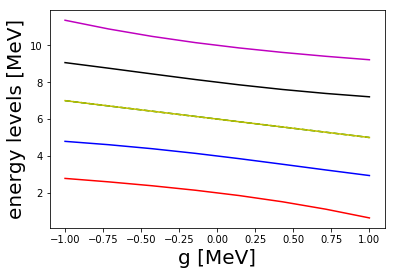

In [1]:
#We leave the number of pairs $a$, 
#total number of available energy states (without spin) $n$, 
#spacing between energy states $eps$ and interaction strength $g$ variable.

#Assuming pairs remain unbroken.

%matplotlib inline
import matplotlib.pyplot as plt
import scipy.special as sp
import numpy as np
import numpy.linalg as LA

a = 2
n = 4
eps = 1.0
g = np.linspace(-1.0,1.0,8) #array of various interaction strengths.
print(g)
#g = 0.5
# def sp_energies(n,eps):
#     sp_E = []
#     for i in range(n):
#         #ground single particle energy is considered to be zero.
#         sp_E.append(eps*i)
#     return sp_E

# sp_E = sp_energies(n,eps)
# print(sp_E)


# def configs(a,n,eps):
#     n_configs = 

dim = int(sp.gamma(n+1)/(sp.gamma(a+1)*sp.gamma(n-a+1)))
print('number of states = ', dim)

H = np.zeros((dim,dim))
H = np.matrix(H)


def hamiltonian(g,dim,eps):
    E = [2*eps,4*eps,6*eps, 6*eps, 8*eps, 10*eps]
    for i in range(dim):
        for j in range(dim):
            if i==j:
                H[i,j] = E[i] - g
            elif (i+j) == (dim-1) :
                H[i,j] = 0.0
            else:
                H[i,j] = -g/2.0
                
    evals = LA.eigvals(H)
    if (g == -0.25) :
        print(evals)
    #evals,evecs = LA.eigh(H)
    return np.sort(evals)

e_vals = np.zeros((len(g),dim))
for j in range(len(g)):
    e_vals[j] = hamiltonian(g[j],dim,eps)
    
#print(e_vals)

plt.plot(g,e_vals[:,0],'r')
plt.plot(g,e_vals[:,1],'b')
plt.plot(g,e_vals[:,2],'g--')
plt.plot(g,e_vals[:,3],'y')
plt.plot(g,e_vals[:,4],'k')
plt.plot(g,e_vals[:,5],'m')
plt.xlabel('g [MeV]',fontsize = 20)
plt.ylabel('energy levels [MeV]',fontsize = 20)
plt.legend()

#We observe double degeneracy of third and fourth energy eignevalues 
#irrespective of the coupling strength. 

#Understand the effect of decreasing level spacing between single particle states 
#at constant interactino strength


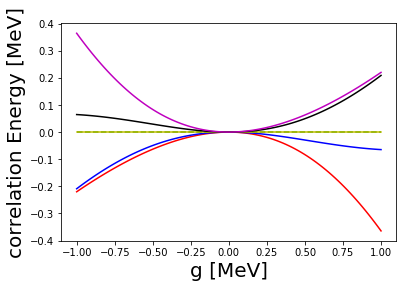

In [100]:
#next we would like to compute correlation energy
E = [2*eps,4*eps,6*eps, 6*eps, 8*eps, 10*eps]
corr = np.zeros((dim,len(g)))
for i in range(dim):
    for j in range(len(g)):
        corr[i][j] = e_vals[j][i] + g[j] - E[i] #exact energy - energy in first perturbation
# for i in range(dim):
#     for j in range(len(g)):
#         corr[i] =  (e_vals[j][i] - g[j])
plt.plot(g,corr[0,:],'r')
plt.plot(g,corr[1,:],'b')
plt.plot(g,corr[2,:],'g--')
plt.plot(g,corr[3,:],'y')
plt.plot(g,corr[4,:],'k')
plt.plot(g,corr[5,:],'m')
plt.xlabel('g [MeV]',fontsize = 20)
plt.ylabel('correlation Energy [MeV]',fontsize = 20)
plt.legend()

In [38]:
import numpy as np
import itertools
import scipy.special as sp

#Input
no_particles = 4
no_sp_states = 4
M = 0
l = 0
spin = 1/2
degeneracy = int(2*spin + 1)
j = spin
eps = 1.0 #MeV

#Single particle generator
no_sp_states *= degeneracy
#no_states += 1
basis_data = np.zeros((no_sp_states,6))
for i in range(no_sp_states):
    #print(i)
    basis_data[i][0] = int(i+1)
    if i ==0 or i == 1: 
        basis_data[i][1] = 1
    else: 
        basis_data[i][1] = int(i/degeneracy + 1)
        
    basis_data[i][2] = int(0)
    basis_data[i][3] = spin
    basis_data[i][4] = 2*j
    basis_data[i][5] = spin*(-1)**i
print("single particle basis data = ")
print(basis_data)



#many body configuration generator
states = np.linspace(1,no_sp_states,no_sp_states,dtype = int)
#print(states)
occupations = list(itertools.combinations(states,no_particles)) #calculates possible combinations
print("slater determinants = ")
print(occupations)
#print("done")


def no_MB_states(no_sp_states,no_particles):
    #a function that computes number of possible combinations for $no_particles$ of 
    #identical particles in $no_sp_states$ number of single particle states 
    ndim = int(sp.gamma(no_sp_states+1)\
               /(sp.gamma(no_particles + 1)*(sp.gamma(no_sp_states - no_particles + 1))))
    return ndim


ndim = no_MB_states(no_sp_states,no_particles)
#if occupied data is a table
occupied_data = np.zeros((ndim,no_particles+1))
MB_fixedM = []

for i in range(ndim):
    i_M = 0
    for j in range(no_particles):
        occupied_data[i][j] = occupations[i][j]
        i_M += basis_data[(occupations[i][j]-1)][5]
    occupied_data[i][no_particles] = i_M
    if i_M == M :
        MB_fixedM.append(occupied_data[i][0:no_particles])
    
#print(occupied_data)

print("M = 0 slater determinants = ")
print(MB_fixedM)
#print("done")
print(len(MB_fixedM))

single particle basis data = 
[[ 1.   1.   0.   0.5  1.   0.5]
 [ 2.   1.   0.   0.5  1.  -0.5]
 [ 3.   2.   0.   0.5  1.   0.5]
 [ 4.   2.   0.   0.5  1.  -0.5]
 [ 5.   3.   0.   0.5  1.   0.5]
 [ 6.   3.   0.   0.5  1.  -0.5]
 [ 7.   4.   0.   0.5  1.   0.5]
 [ 8.   4.   0.   0.5  1.  -0.5]]
slater determinants = 
[(1, 2, 3, 4), (1, 2, 3, 5), (1, 2, 3, 6), (1, 2, 3, 7), (1, 2, 3, 8), (1, 2, 4, 5), (1, 2, 4, 6), (1, 2, 4, 7), (1, 2, 4, 8), (1, 2, 5, 6), (1, 2, 5, 7), (1, 2, 5, 8), (1, 2, 6, 7), (1, 2, 6, 8), (1, 2, 7, 8), (1, 3, 4, 5), (1, 3, 4, 6), (1, 3, 4, 7), (1, 3, 4, 8), (1, 3, 5, 6), (1, 3, 5, 7), (1, 3, 5, 8), (1, 3, 6, 7), (1, 3, 6, 8), (1, 3, 7, 8), (1, 4, 5, 6), (1, 4, 5, 7), (1, 4, 5, 8), (1, 4, 6, 7), (1, 4, 6, 8), (1, 4, 7, 8), (1, 5, 6, 7), (1, 5, 6, 8), (1, 5, 7, 8), (1, 6, 7, 8), (2, 3, 4, 5), (2, 3, 4, 6), (2, 3, 4, 7), (2, 3, 4, 8), (2, 3, 5, 6), (2, 3, 5, 7), (2, 3, 5, 8), (2, 3, 6, 7), (2, 3, 6, 8), (2, 3, 7, 8), (2, 4, 5, 6), (2, 4, 5, 7), (2, 4, 5, 8), (2, 4, 6,

In [49]:
#pairing Model

ph = np.arange(2,no_particles+2,2)

ph_dict = {}
ph_dict[0] = MB_fixedM[0]
MB_state_dict = {}

for i in ph:
    ph_dict.setdefault(i, [])

def paired_states(bra):
    # returns whether all the particles are paired or not in a given state
    x = []
    for i in np.arange(0,len(bra),2):
        x.append((bra[i]%2 != 0 and bra[i+1] == bra[i] + 1))
    res = x[0]
    for i in range(len(x)):
        res = res and x[i]
    return res

def ph_config(bra,ket):
    #returns number of ph excitations of a given state
    return len(bra) - len(set(bra) & set(ket)) 

tot_dim = 0
MB_state_dict[tot_dim] = MB_fixedM[0]
for bra in MB_fixedM:
    for np_nh in ph:
        if (paired_states(bra) == True) and ph_config(bra,MB_fixedM[0])== np_nh :
            tot_dim+=1
            MB_state_dict[tot_dim] = bra
            ph_dict[np_nh].append(bra)
                
                
print('Dictionary for np-nh states with key n = ')
print(ph_dict)
print(" ")
print('Dictionary for mapping no-broken pair states number n to SD with key n = ')
print(MB_state_dict)
print("done")

5
Dictionary for np-nh states with key n = 
{0: array([ 1.,  2.,  3.,  4.]), 2: [array([ 1.,  2.,  5.,  6.]), array([ 1.,  2.,  7.,  8.]), array([ 3.,  4.,  5.,  6.]), array([ 3.,  4.,  7.,  8.])], 4: [array([ 5.,  6.,  7.,  8.])]}
 
Dictionary for mapping no-broken pair states number n to SD with key n = 
{0: array([ 1.,  2.,  3.,  4.]), 1: array([ 1.,  2.,  5.,  6.]), 2: array([ 1.,  2.,  7.,  8.]), 3: array([ 3.,  4.,  5.,  6.]), 4: array([ 3.,  4.,  7.,  8.]), 5: array([ 5.,  6.,  7.,  8.])}
done


In [50]:
eps = 1.0
strength = 0.25
import numpy.linalg as LA


def sp_energies(i,eps):
    #single particle energy in energy state i
    #eps:energy spacing between 
    if i ==1 or i==2:
        return 0.0
    elif i%2 !=0 :
        return (i//2)*eps
    else:
        return (i/2 - 1)*eps

def h0(bra,eps):
    #states i,j represent ith and jth many body state.
    #print(0, bra)
    e_i = 0.0
    for nn in range(len(bra)):
        e_i += sp_energies(bra[nn],eps)
        #print(nn,bra)
    return e_i

def V2(bra,ket):
    if paired_states(bra) == True and paired_states(ket) == True:
        if ph_config(bra,ket) == 0:
            return -strength
        elif ph_config(bra,ket) == 2:
            return -strength/2.0
        else:
            return 0.0
    else:
        return 0.0
    
Hdim = tot_dim +1
#Hdim = no_MB_states(no_sp_states/2,no_particles/2)
H = np.zeros((Hdim,Hdim))

for mu in range(Hdim):
    for nu in range(Hdim):
        bra = MB_state_dict[mu]
        ket = MB_state_dict[nu]
        if mu == nu:
            H0.append(h0(bra,eps))
            H[mu][nu] = h0(bra,eps) + V2(bra,bra)
            #print(mu,h0(mu,eps))
        else:
            H[mu][nu] = V2(bra,ket)
            H[nu][mu] = H[mu][nu]
            
        
print(H)
evals = LA.eigvals(H)      

print(evals)
          

[[ 1.75  -0.125 -0.125 -0.125 -0.125  0.   ]
 [-0.125  3.75  -0.125 -0.125  0.    -0.125]
 [-0.125 -0.125  5.75   0.    -0.125 -0.125]
 [-0.125 -0.125  0.     5.75  -0.125 -0.125]
 [-0.125  0.    -0.125 -0.125  7.75  -0.125]
 [ 0.    -0.125 -0.125 -0.125 -0.125  9.75 ]]
[ 1.73045985  3.74102498  5.75        7.76155657  9.76695861  5.75      ]


In [39]:
def paired_states(bra):
    x = []
    for i in np.arange(0,len(bra),2):
        x.append((bra[i]%2 != 0 and bra[i+1] == bra[i] + 1))
    res = x[0]
    for i in range(len(x)):
        res = res and x[i]
    return res


eps = 1.0
strength = 0.25
import numpy.linalg as LA


def sp_energies(i,eps):
    #single particle energy in energy state i
    #eps:energy spcing
    if i==1 or i==2:
        return 0.0
    elif i%2 !=0 :
        return (i//2)*eps
    else:
        return (i/2 - 1)*eps
    



def h0(bra,eps):
    #states i,j represent ith and jth many body state.
    #print(0, bra)
    e_i = 0.0
    for nn in range(len(bra)):
        e_i += sp_energies(bra[nn],eps)
        #print(nn,bra)
    return e_i

def V2(bra,ket):    
    #pairing potential
    if paired_states(bra) == True and paired_states(ket) == True:
        if ph_config(bra,ket) == 0:
            return -strength
        elif ph_config(bra,ket) == 2:
            return -strength/2.0
        else:
            return 0.0
    else:
        return 0.0
    
Hdim = len(MB_fixedM)    
H = np.zeros((Hdim,Hdim))
H0 = []
for mu in range(Hdim):
    for nu in range(Hdim):
        #print(mu,nu)
        bra = MB_fixedM[mu]
        ket = MB_fixedM[nu]
        if mu == nu:
            H0.append(h0(bra,eps))
            H[mu][nu] = h0(bra,eps) + V2(bra,bra)
            #print(mu,h0(mu,eps))
        else:
            H[mu][nu] = V2(bra,ket)
            H[nu][mu] = H[mu][nu]
            
        
#print(H)
evals = np.sort(LA.eigvals(H)) 
evals -= np.sort(H0)
print(evals)

[-0.26954015  0.          0.         -0.25897502  0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
 -0.25       -0.25        0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
 -0.23844343  0.          0.          0.          0.          0.          0.
 -0.23304139]


In [16]:
#Double Check
a = 2
n = 4
dim = int(sp.gamma(n+1)/(sp.gamma(a+1)*sp.gamma(n-a+1)))
print('number of states = ', dim)
H = np.zeros((dim,dim))
H = np.matrix(H)

g = 0.25
eps = 1.0
def hamiltonian(g,dim,eps):
    E = [2*eps,4*eps,6*eps, 6*eps, 8*eps, 10*eps]
    for i in range(dim):
        for j in range(dim):
            if i==j:
                H[i,j] = E[i] - g
            elif (i+j) == (dim-1) :
                H[i,j] = 0.0
            else:
                H[i,j] = -g/2.0
                
    evals = LA.eigvals(H)
#     if (g == -0.25) :
#         print(evals)
    #evals,evecs = LA.eigh(H)
    return np.sort(evals)


evals = hamiltonian(g,dim,eps)
print(evals)

number of states =  6
[ 1.73045985  3.74102498  5.75        5.75        7.76155657  9.76695861]


In [18]:
from sympy import *
from sympy.physics.secondquant import *
i, j = symbols('i,j', below_fermi=True)
a, b = symbols('a,b', above_fermi=True)
p, q = symbols('p,q')
print(simplify(wicks(Fd(i)*F(a)*Fd(p)*F(q)*Fd(b)*F(j), keep_only_fully_contracted=True)))
#Fd is fermionic creation operator and F is fermionic annihilation operator.

KroneckerDelta(_i, q)*KroneckerDelta(a, b)*KroneckerDelta(i, j)*KroneckerDelta(p, q) - KroneckerDelta(a, b)*KroneckerDelta(i, q)*KroneckerDelta(j, p) + KroneckerDelta(a, p)*KroneckerDelta(b, q)*KroneckerDelta(i, j)
